In [309]:
import requests
import json
from contextlib import closing
# make base URL and dictionary of get request key/values
url = "https://content.guardianapis.com/search"
payload = {'api-key': "6ff8fcd2-050d-4801-a29f-848c8b750b6e", 'q':'parliament', 'show-blocks':'body', 
           'page-size': 200, 'show-tags': 'contributor'} # key/values for get request (look up in api, there are lots)

# Perform the actual request
with closing(requests.get(url,params=payload)) as r:
    articles = r.json()
#     print(articles)
summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results'] if x['tags']]
# print(summaries)
# summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results']]
# print(len(summaries))
# # print(len([word for document in summaries for word in summaries[0].split()]))
words = [word for document in summaries for word in document.split()]
print(words)
print(len(words))

['An', 'ally', 'of', 'the', 'former', 'Italian', 'prime', 'minister', 'Silvio', 'Berlusconi', 'has', 'been', 'elected', 'president', 'of', 'the', 'European', 'parliament', 'after', 'a', 'deal', 'was', 'struck', 'between', 'two', 'of', 'the', 'institution’s', 'largest', 'political', 'groups,', 'consolidating', 'a', 'conservative', 'grip', 'on', 'key', 'European', 'Union', 'institutions.', 'Antonio', 'Tajani,', 'who', 'has', 'been', 'elected', 'as', 'an', 'MEP', 'four', 'times', 'and', 'was', 'previously', 'a', 'vice-president', 'of', 'the', 'European', 'parliament,', 'beat', 'the', 'centre-left', 'leader', 'and', 'fellow', 'Italian', 'Gianni', 'Pittella', 'by', '351', 'votes', 'to', '282', 'in', 'a', 'rare', 'fourth-round', 'runoff,', 'contrary', 'to', 'past', 'appointments', 'decided', 'by', 'mainstream', 'parties', 'before', 'the', 'voting.', 'Tajani’s', 'victory', 'followed', 'a', 'pact', 'between', 'his', 'centre-right', 'group', 'and', 'the', 'liberals,', 'led', 'by', 'the', 'Brexi

In [323]:
doc_lengths = []
for document in summaries:
    length = 0
    for word in document.split():
        length += 1
    doc_lengths.append(length)


In [311]:
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter('ignore', DeprecationWarning)
%matplotlib inline 

[<matplotlib.text.Text at 0x1244be0b8>, <matplotlib.text.Text at 0x125b79550>]

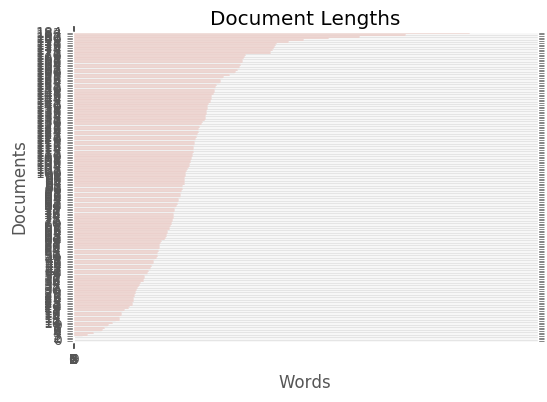

In [312]:
import pandas as pd
doc_lengths.sort()
df = pd.DataFrame({'Lengths': doc_lengths})
plt.style.use('ggplot')
labels = list(range(0,10))
ax = df.plot(kind="barh",xticks=labels, legend=False, title="Document Lengths")
ax.set(xlabel="Words",ylabel="Documents")

#ax.set_yticklabels(list(range(0,50)))

In [313]:
num = list(range(0,50))
print(num)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]


In [314]:
# combined stop words from scikit-Learn's original source and 2 others, for 617 stop words
# https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/feature_extraction/stop_words.py
# https://sites.google.com/site/kevinbouge/stopwords-lists
# http://algs4.cs.princeton.edu/35applications/stopwords.txt
with open("combined_stop_words.txt") as textfile:
    stopwords = textfile.readlines()
    stopwords = [word.strip() for word in stopwords]

In [315]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words=stopwords)
# count_vect = CountVectorizer(stop_words=stopwords,
#                               max_df=0.01,
#                               min_df=4)
bag = count_vect.fit_transform(summaries)
pd.options.display.max_columns = 999
df = pd.DataFrame(data=bag.toarray(),columns=count_vect.get_feature_names())
df

000  012  04  074  10  100  100g  100ml  101  102  107m  10am  10b  10km  \
0      0    0   0    0   0    0     0      0    0    0     0     0    0     0   
1      0    0   0    0   0    0     0      0    0    0     0     0    0     0   
2      0    0   0    0   0    0     0      0    0    0     0     0    0     0   
3      0    0   0    0   0    0     0      0    0    0     0     0    0     0   
4      0    0   0    0   0    0     0      0    0    0     0     0    0     0   
5      0    0   0    0   0    0     0      0    0    0     0     0    0     0   
6      1    0   0    0   0    0     0      0    0    0     0     0    0     0   
7      0    0   0    0   1    0     0      0    0    0     0     0    0     0   
8      5    0   0    0   0    0     0      0    0    0     0     0    0     0   
9      0    0   0    0   0    0     0      0    0    0     0     0    0     0   
10     0    0   0    0   1    0     0      0    0    0     0     0    0     0   
11     0    0   0    0   0    0     0      0    0    0     0     0    0     0   
12     0    0   0    0   0    0     0      0    0    0     0     0    0     0   
13     0    0   0    0   0    0     0      0    0    0     0     0    0     0   
14     0    0   0    0   0    0     0      0    0    0     0     0    0     0   
15     0    0   0    0   1    0     0      0    0    0     0     0    0     0   
16     0    0   0    0   0    0     0      0    0    0     0     0    0     0   
17     0    0   0    0   0    0     0      0    1    0     0     0    0     0   
18     0    0   0    0   0    0     0      0    0    0     0     0    0     0   
19     0    0   0    0   0    0     0      0    0    0     0     0    0     0   
20     0    0   0    0   4    0     0      0    0    0     0     0    0     0   
21     0    0   0    0   0    0     0      0    0    0     0     0    0     0   
22     0    0   0    0   0    0     0      0    0    0     0     0    0     0   
23     1    0   0    0   0    0     0      0    0    0     0     0    0     0   
24     0    0   0    0   2    0     0      0    0    0     0     0    0     0   
25     0    0   0    0   0    0     0      0    0    0     0     0    0     0   
26     1    0   0    0   1    0     0      0    0    0     0     0    0     0   
27     0    0   0    0   1    0     0      0    0    0     0     0    0     0   
28     0    0   0    0   0    0     0      0    0    0     0     0    0     0   
29     0    0   0    0   0    0     0      0    0    0     0     0    0     0   
..   ...  ...  ..  ...  ..  ...   ...    ...  ...  ...   ...   ...  ...   ...   
155    0    0   0    0   0    0     0      0    0    1     0     0    0     0   
156    0    0   0    0   1    0     0      0    0    0     0     0    0     0   
157    0    0   0    0   1    0     0      0    0    0     0     0    0     0   
158    0    0   0    0   0    0     0      0    0    0     0     0    0     0   
159    2    0   0    0   1    0     0      0    0    0     0     0    0     0   
160    0    0   0    0   2    0     0      0    0    0     0     0    0     0   
161    0    0   0    0   0    0     0      0    0    0     0     0    0     0   
162    1    0   0    0   0    0     0      0    0    0     0     0    0     0   
163    0    0   0    0   0    0     0      0    0    0     0     0    0     0   
164    0    0   0    0   0    0     0      0    0    0     0     0    0     0   
165    0    0   0    0   0    0     0      0    0    0     0     0    0     0   
166    0    0   0    0   0    0     0      0    0    0     0     0    0     0   
167    0    0   0    0   0    0     0      0    0    0     0     0    0     0   
168    0    0   0    0   1    0     0      0    0    0     0     0    0     0   
169    0    0   0    0   2    0     0      0    0    0     0     0    0     0   
170    0    0   0    0   1    0     0      0    0    0     0     0    0     0   
171    0    0   0    0   1    2     0      0    0    0     0     0    0     0   
172    0    0   0    0   0    0     

[<matplotlib.text.Text at 0x12fe30fd0>, <matplotlib.text.Text at 0x13047ce48>]

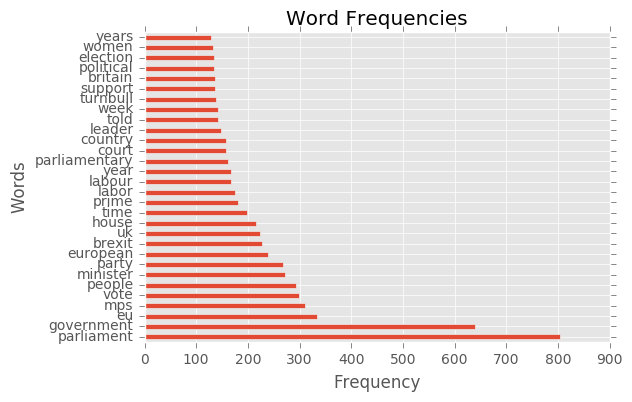

In [316]:
frequencies = df.sum()

frequencies.sort_values(inplace=True)
largest = frequencies.nlargest(30)
ax = largest.plot(kind = "barh",title="Word Frequencies")
ax.set(xlabel="Frequency",ylabel="Words")



In [317]:
url = "https://content.guardianapis.com/search"
payload = {'api-key': "6ff8fcd2-050d-4801-a29f-848c8b750b6e", 'q':'brexit', 'show-blocks':'body', 
           'page-size': 150, 'show-tags': 'contributor' } # key/values for get request (look up in api, there are lots)

In [318]:
with closing(requests.get(url,params=payload)) as r:
    articles = r.json()
#     print(articles)
summaries = [x['sectionId'] for x in articles['response']['results']]
# print(summaries)
# summaries = [x['blocks']['body'][0]['bodyTextSummary'] for x in articles['response']['results']]
# print(len(summaries))
# # print(len([word for document in summaries for word in summaries[0].split()]))
words = [word for document in summaries for word in document.split()]
words_no_dup = list(set(words))


In [319]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

tfidf_vect = TfidfVectorizer(stop_words=stopwords)

tfidf_mat = tfidf_vect.fit_transform(summaries) 
# convert to pandas to get better idea about the data
df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
df

artanddesign  books  business  circular  commentisfree  economy  \
0             0.0    0.0       0.0       0.0            0.0      0.0   
1             0.0    0.0       0.0       0.0            0.0      0.0   
2             0.0    0.0       0.0       0.0            0.0      0.0   
3             0.0    0.0       0.0       0.0            0.0      0.0   
4             0.0    0.0       0.0       0.0            0.0      0.0   
5             0.0    0.0       0.0       0.0            0.0      0.0   
6             0.0    0.0       0.0       0.0            0.0      0.0   
7             0.0    0.0       0.0       0.0            0.0      0.0   
8             0.0    0.0       0.0       0.0            0.0      0.0   
9             0.0    0.0       0.0       0.0            0.0      0.0   
10            0.0    0.0       0.0       0.0            0.0      0.0   
11            0.0    0.0       0.0       0.0            0.0      0.0   
12            0.0    0.0       0.0       0.0            0.0      0.0   
13            0.0    0.0       0.0       0.0            0.0      0.0   
14            0.0    0.0       0.0       0.0            0.0      0.0   
15            0.0    0.0       0.0       0.0            0.0      0.0   
16            0.0    0.0       0.0       0.0            0.0      0.0   
17            0.0    0.0       0.0       0.0            0.0      0.0   
18            0.0    0.0       0.0       0.0            0.0      0.0   
19            0.0    0.0       0.0       0.0            0.0      0.0   
20            0.0    0.0       0.0       0.0            0.0      0.0   
21            0.0    0.0       1.0       0.0            0.0      0.0   
22            0.0    0.0       0.0       0.0            0.0      0.0   
23            0.0    0.0       0.0       0.0            0.0      0.0   
24            0.0    0.0       0.0       0.0            0.0      0.0   
25            0.0    0.0       0.0       0.0            0.0      0.0   
26            0.0    0.0       0.0       0.0            0.0      0.0   
27            0.0    0.0       0.0       0.0            0.0      0.0   
28            0.0    0.0       0.0       0.0            1.0      0.0   
29            0.0    0.0       0.0       0.0            0.0      0.0   
..            ...    ...       ...       ...            ...      ...   
120           0.0    0.0       0.0       0.0            0.0      0.0   
121           0.0    0.0       0.0       0.0            1.0      0.0   
122           0.0    0.0       1.0       0.0            0.0      0.0   
123           0.0    0.0       0.0       0.0            0.0      0.0   
124           0.0    0.0       0.0       0.0            0.0      0.0   
125           0.0    0.0       0.0       0.0            0.0      0.0   
126           0.0    0.0       0.0       0.0            1.0      0.0   
127           0.0    0.0       0.0       0.0            1.0      0.0   
128           0.0    0.0       0.0       0.0            0.0      0.0   
129           0.0    0.0       1.0       0.0            0.0      0.0   
130           0.0    0.0       0.0       0.0            1.0      0.0   
131           0.0    0.0       0.0       0.0            0.0      0.0   
132           0.0    0.0       0.0       0.0            0.0      0.0   
133           0.0    0.0       1.0       0.0            0.0      0.0   
134           0.0    1.0       0.0       0.0            0.0      0.0   
135           0.0    0.0       1.0       0.0            0.0      0.0   
136           0.0    0.0       0.0       0.0            0.0      0.0   
137           0.0    0.0       1.0       0.0            0.0      0.0   
138           0.0    0.0       0.0       0.0            0.0      0.0   
139           0.0    0.0       0.0       0.0            0.0      0.0   
140           0.0    0.0       0.0       0.0            0.0      0.0   
141           0.0    0.0       0.0       0.0            0.0      0.0   
142           0.0    0.0       0.0       0.0            0.0      0.0   
143           0.0    0.0       0.0       0.0 

In [320]:
most_common_rel_words = df.sum()

In [321]:
df = pd.DataFrame({'Section IDs': words})
df_grouped = df.groupby(by='Section IDs')


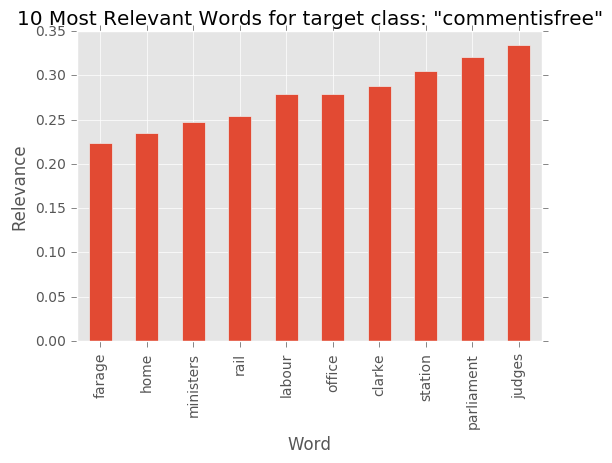

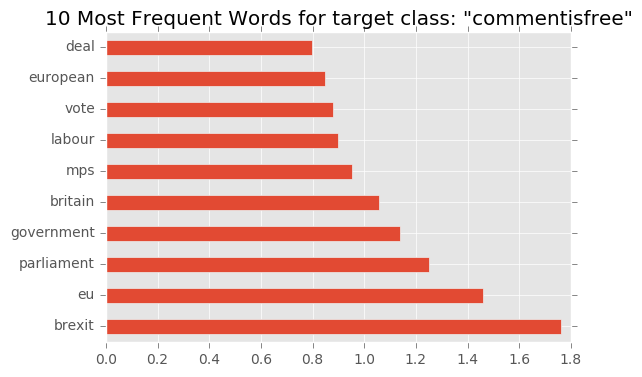

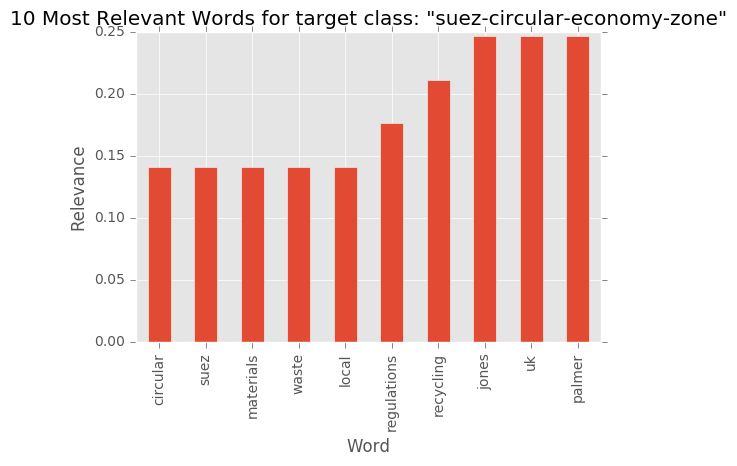

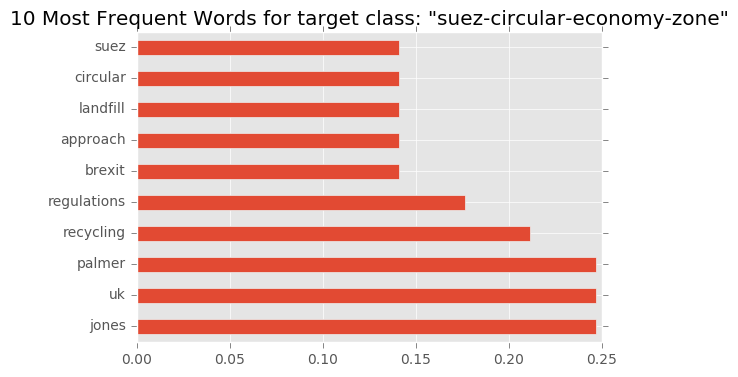

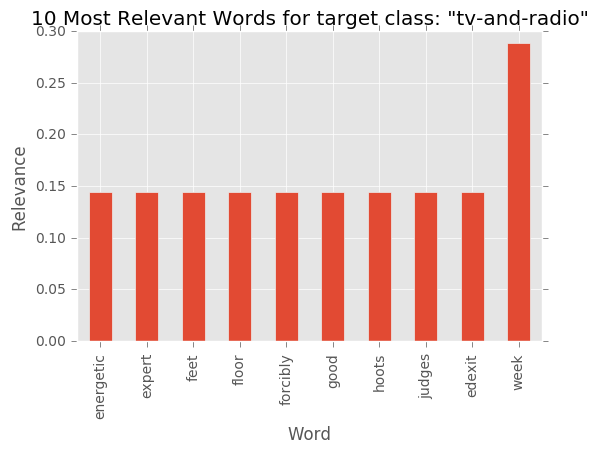

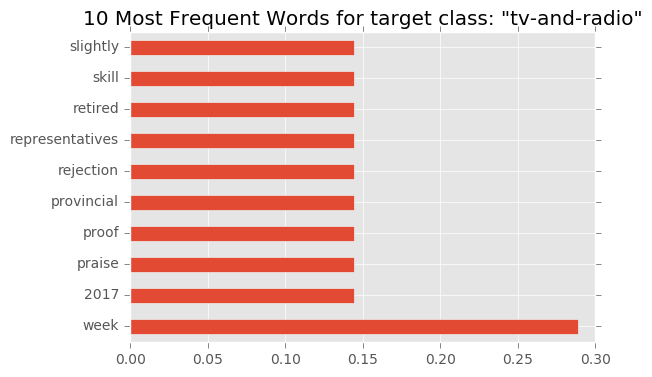

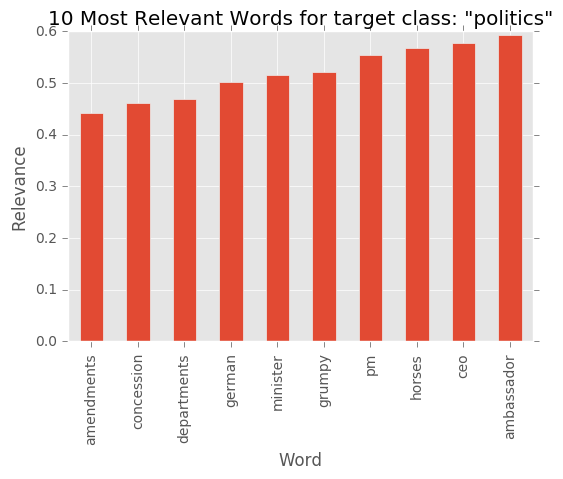

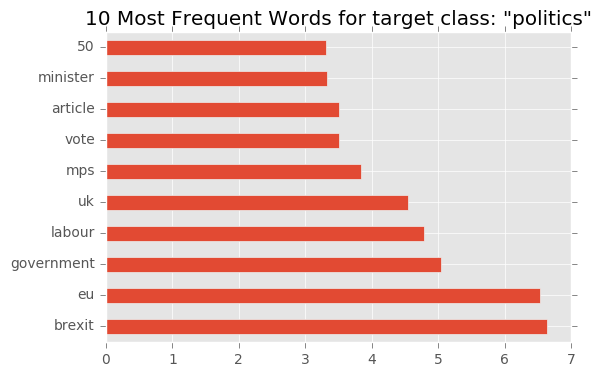

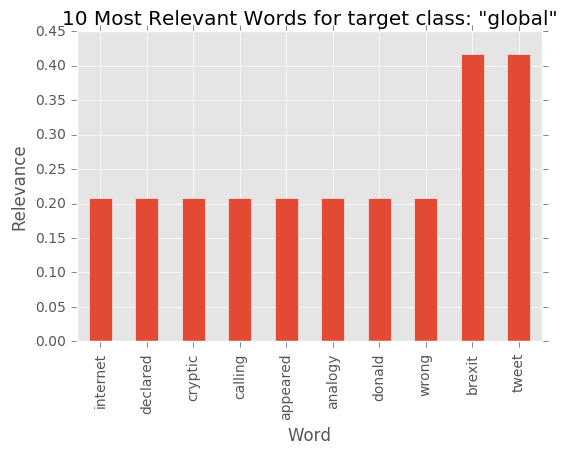

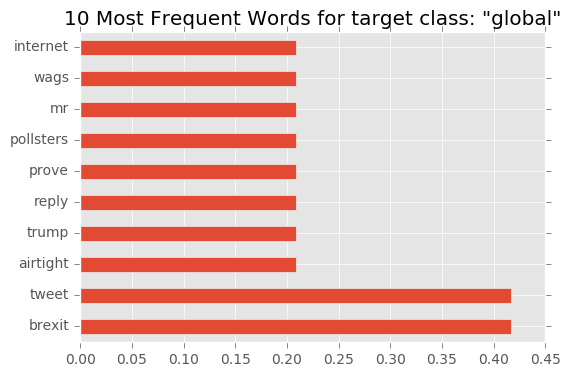

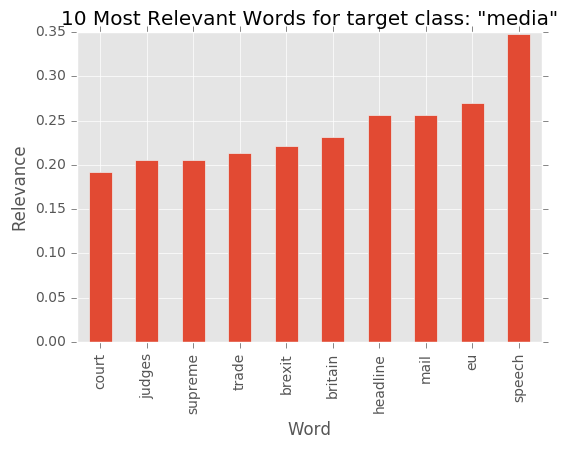

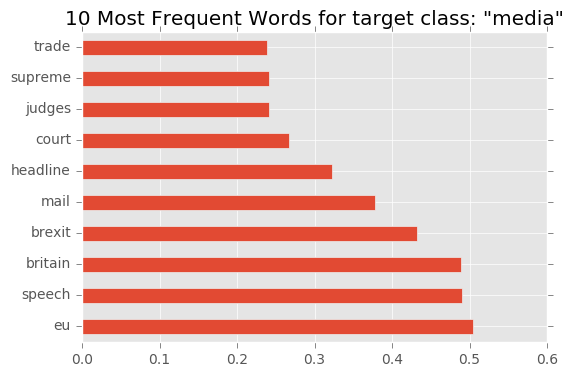

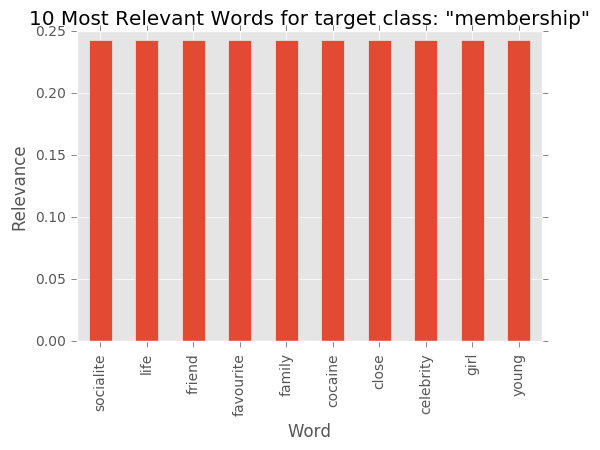

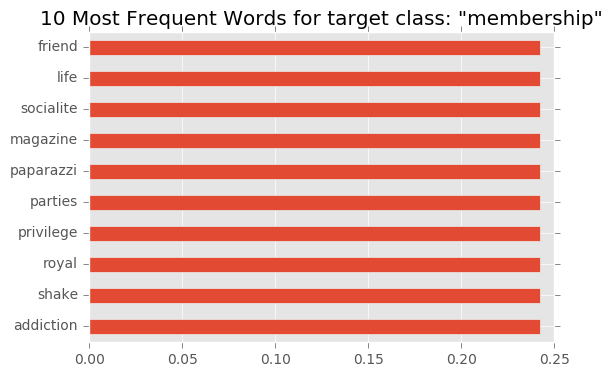

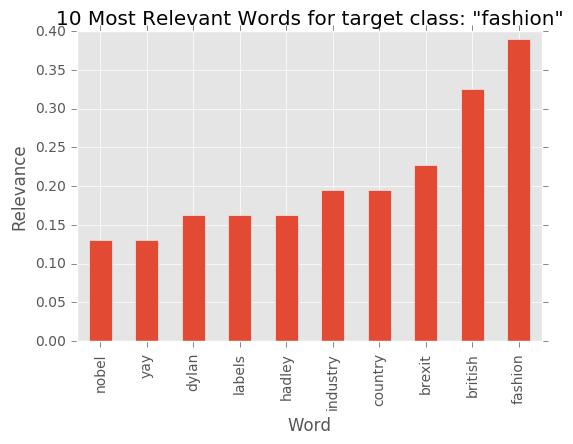

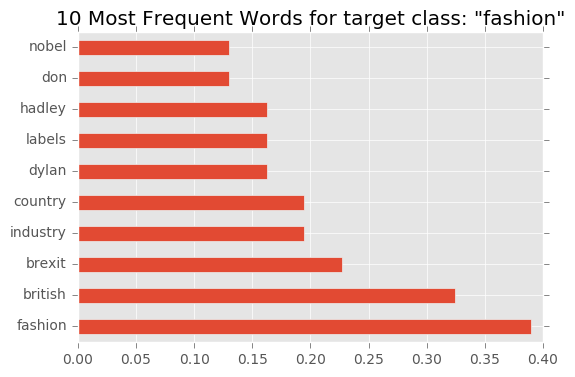

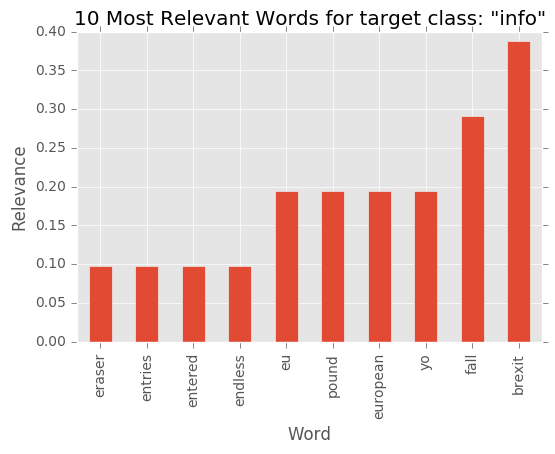

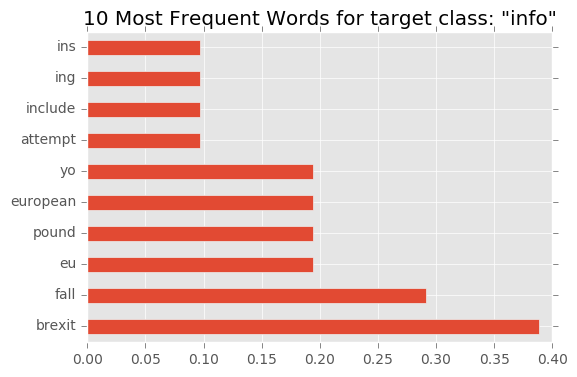

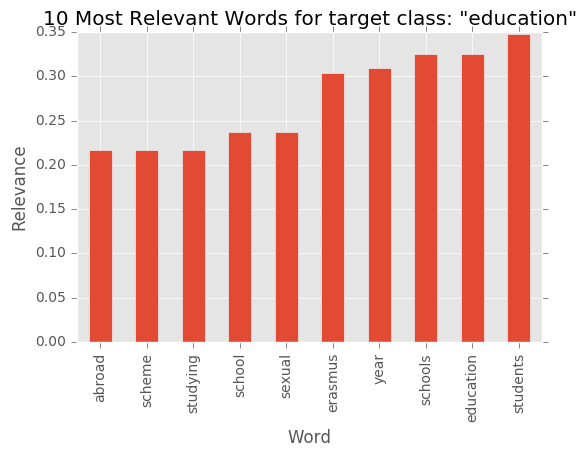

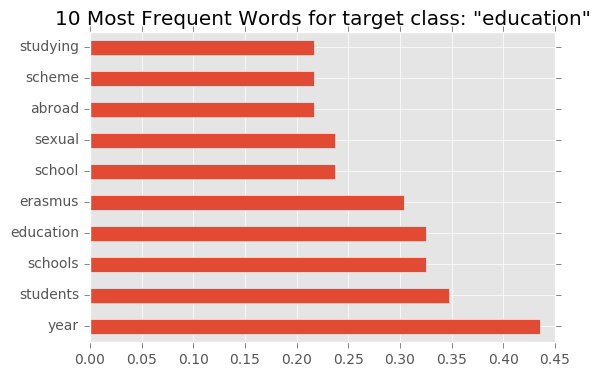

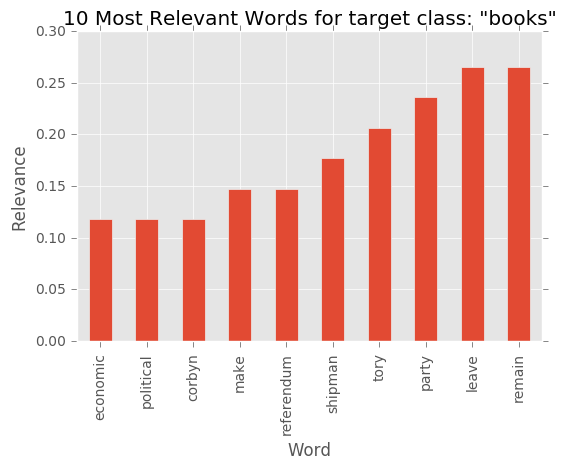

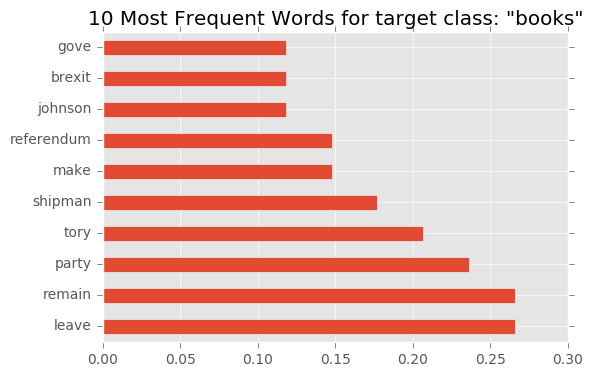

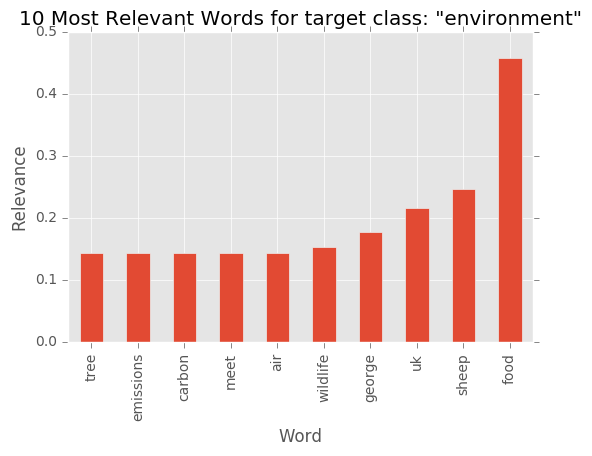

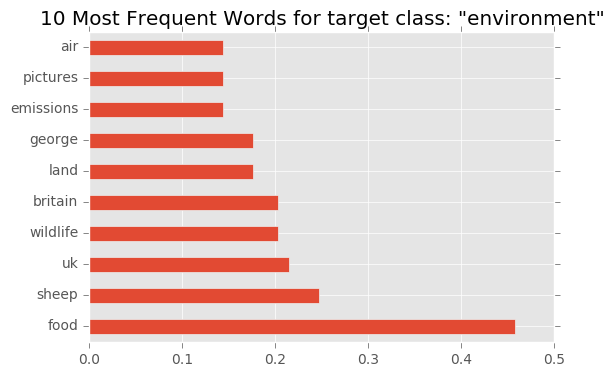

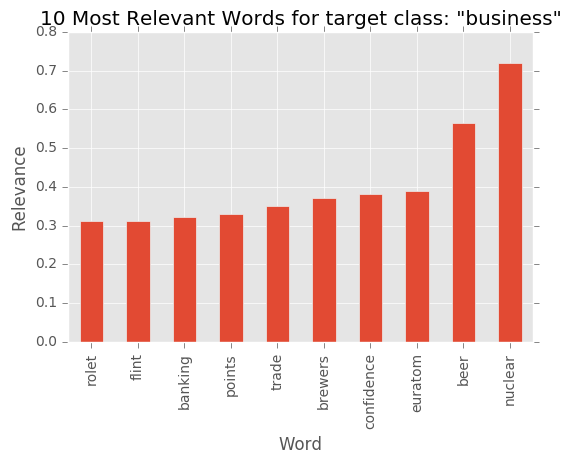

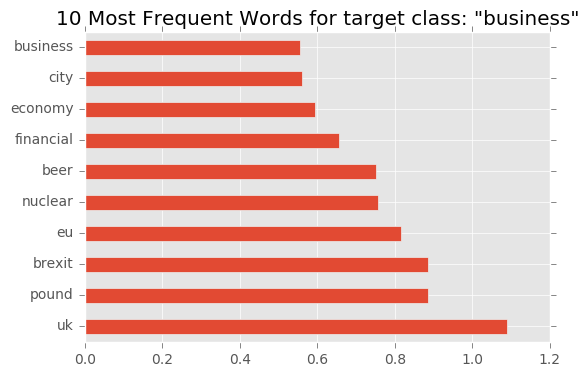

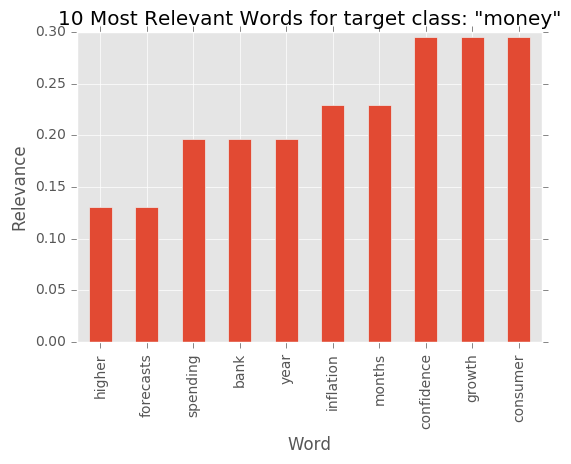

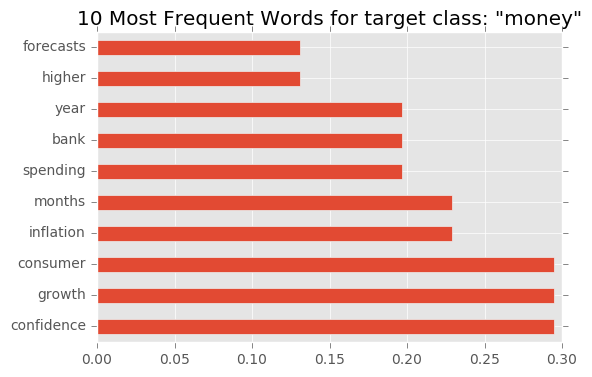

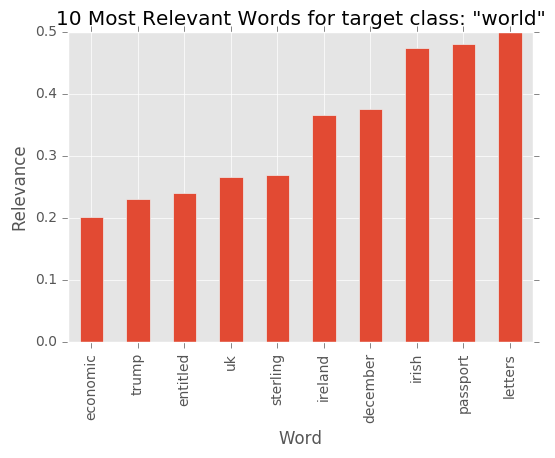

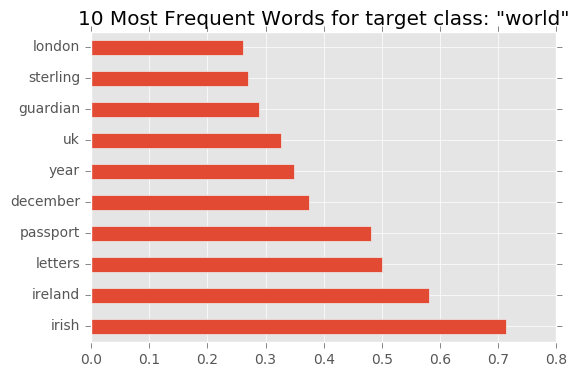

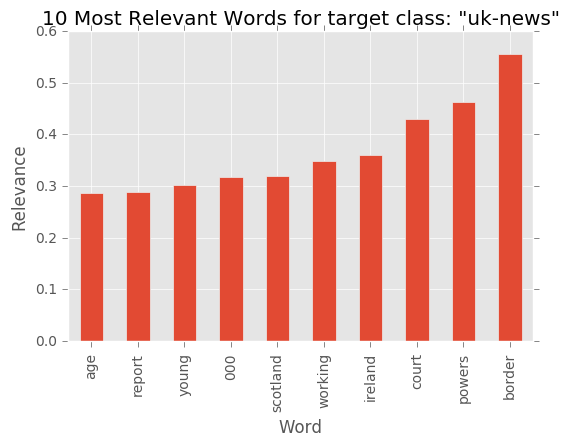

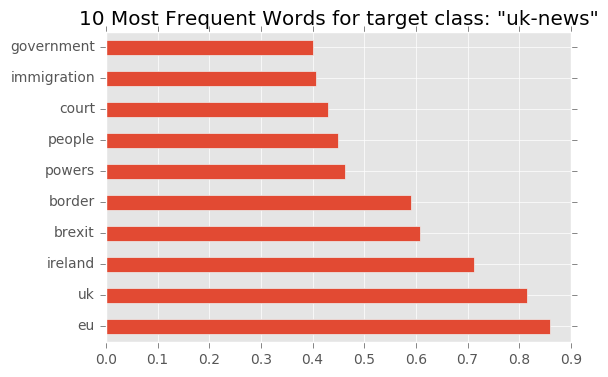

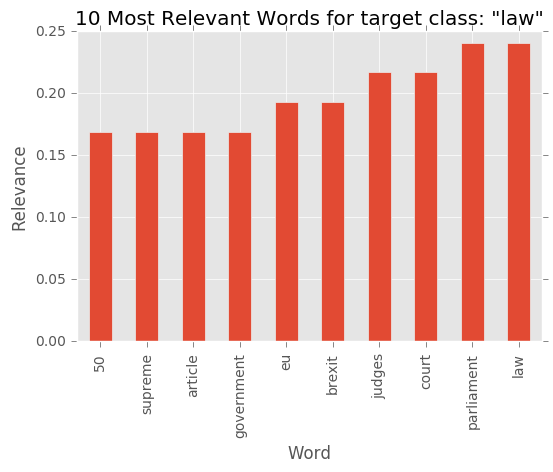

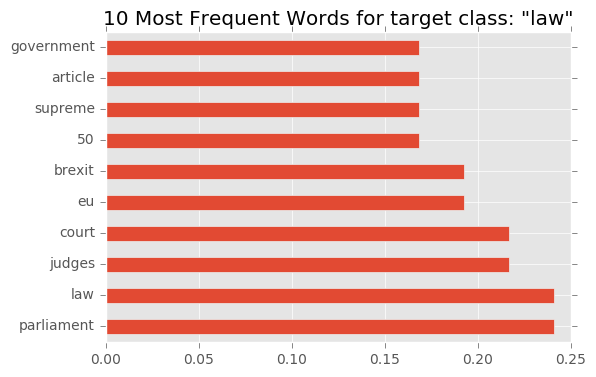

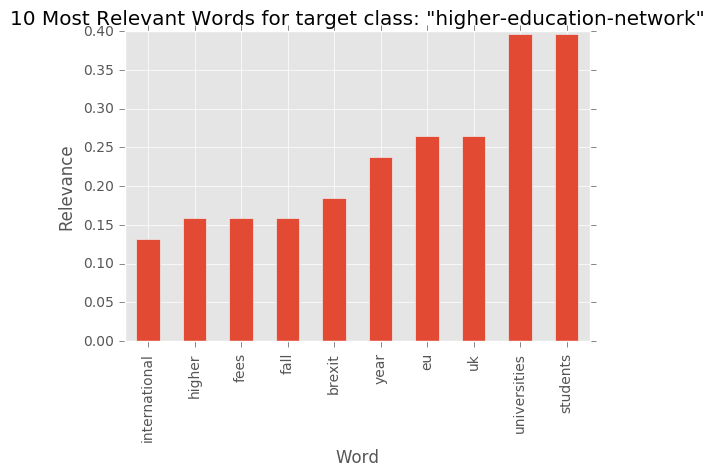

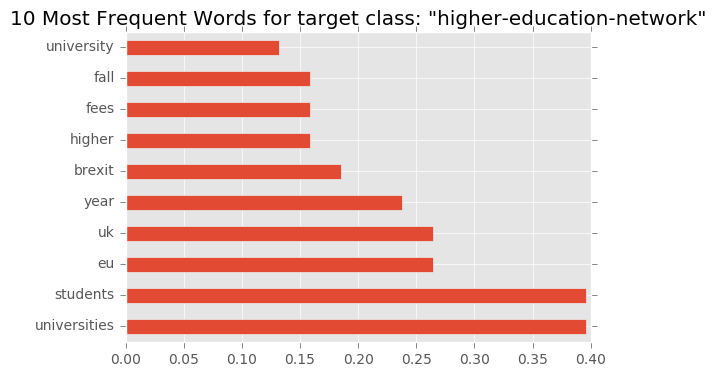

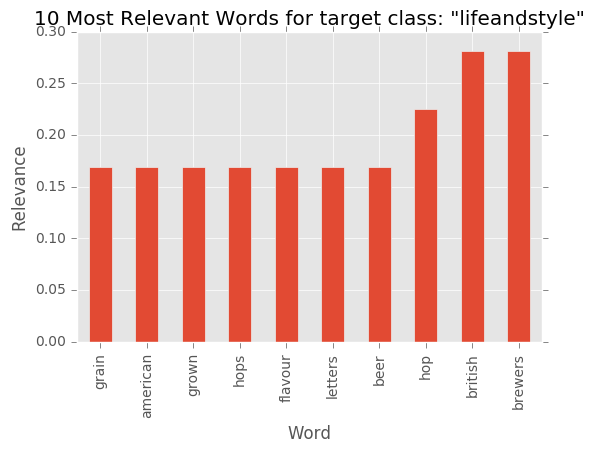

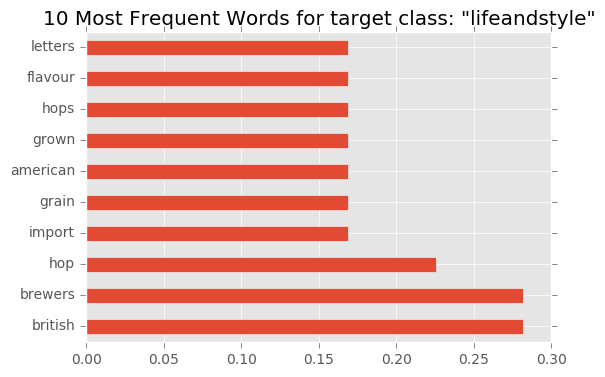

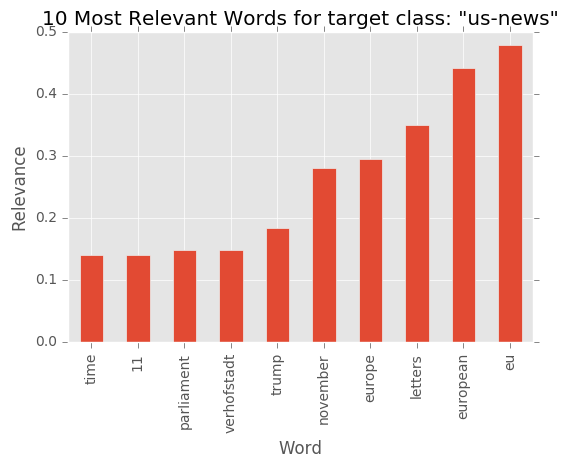

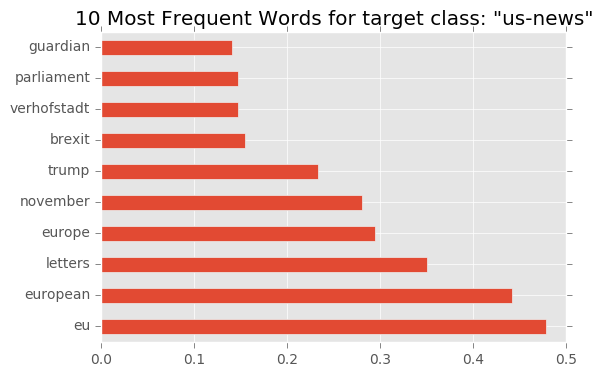

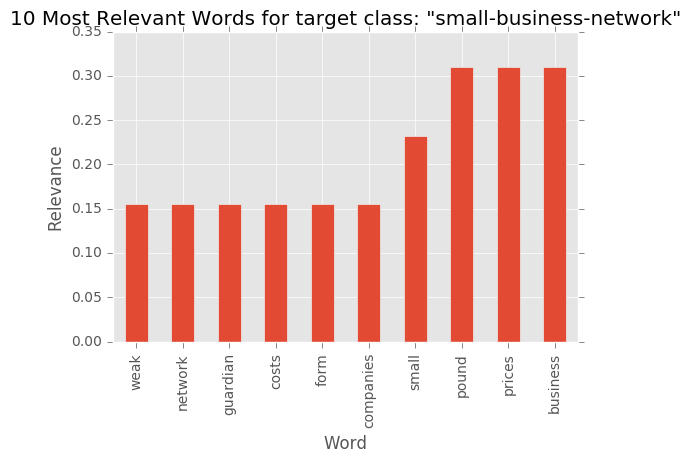

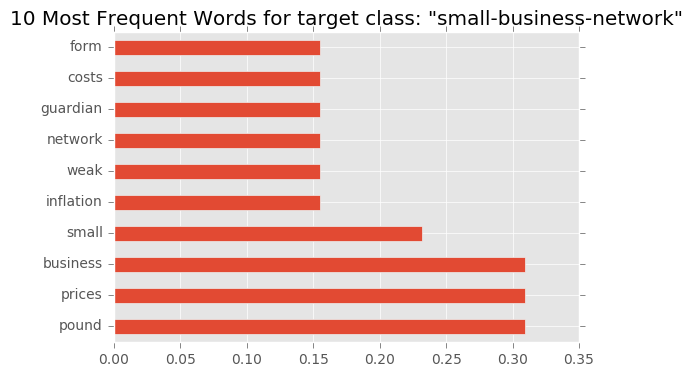

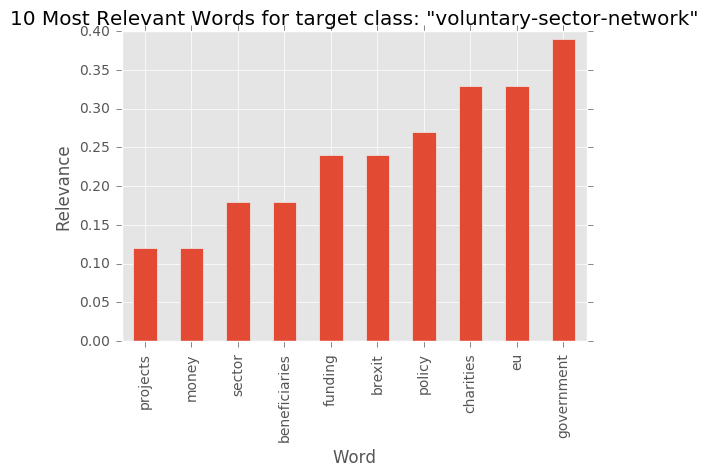

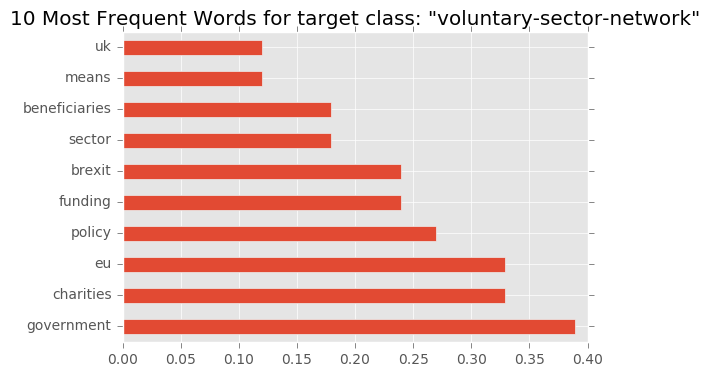

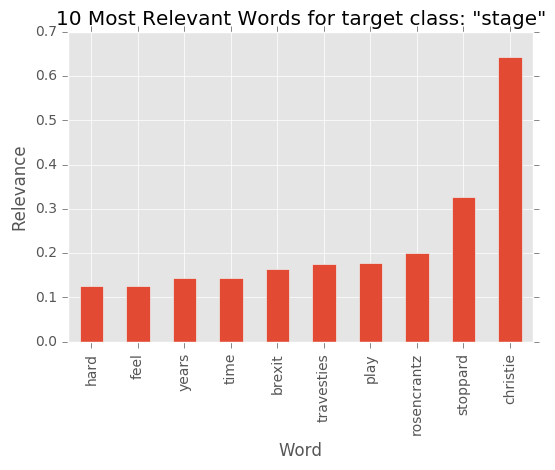

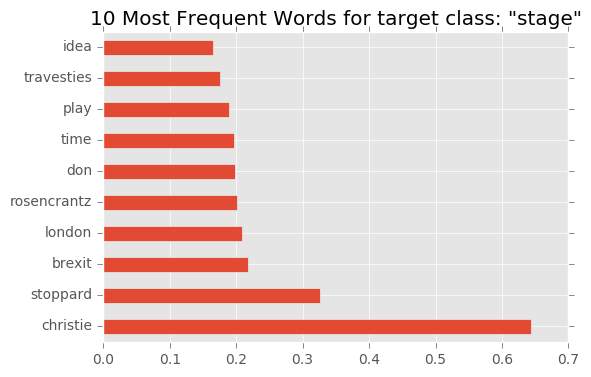

ValueError: empty vocabulary; perhaps the documents only contain stop words

In [326]:

for topic in words_no_dup:
    summaries = []
    for x in articles['response']['results']:
        if x['sectionId']== topic:
            summaries.append(x['blocks']['body'][0]['bodyTextSummary'])
            docs += 1
    ctr+=1
    tfidf_vect = TfidfVectorizer(stop_words=stopwords)
    tfidf_mat = tfidf_vect.fit_transform(summaries) 
    df = pd.DataFrame(data=tfidf_mat.toarray(),columns=tfidf_vect.get_feature_names())
    df_top_10_tfidf = df.max().sort_values()[-10:]
    axis = df_top_10_tfidf.plot(kind='bar', title="10 Most Relevant Words for target class: \"" + topic +"\"")
    
    count_vect = CountVectorizer(stop_words=stopwords)
    bag = count_vect.fit_transform(summaries)
    summaries_df = pd.DataFrame(data=bag.toarray(),columns=count_vect.get_feature_names())

    axis.set_xlabel("Word")
    axis.set_ylabel("Relevance")
    plt.show()
    summaries_df = df.sum()
    summaries_df.sort_values(inplace=True)
    largest = summaries_df.nlargest(10)
    largest.plot(kind = "barh", title="10 Most Frequent Words for target class: \"" + topic +"\"")
    plt.show()
